In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import rasterio

In [2]:
plt.rcParams['figure.figsize'] = (9.6, 7.2)
plt.rcParams['image.cmap'] = 'Set2'

In [3]:
with rasterio.open('../data/LagunaTerminosUsoSuelo.tif', 'r') as r:
    raster = r.read(1)
    raster = np.ma.masked_equal(raster, 0)
    print('Pixel area = {} m^2'.format(np.prod(r.res)))

Pixel area = 625.0 m^2


<IPython.core.display.Javascript object>


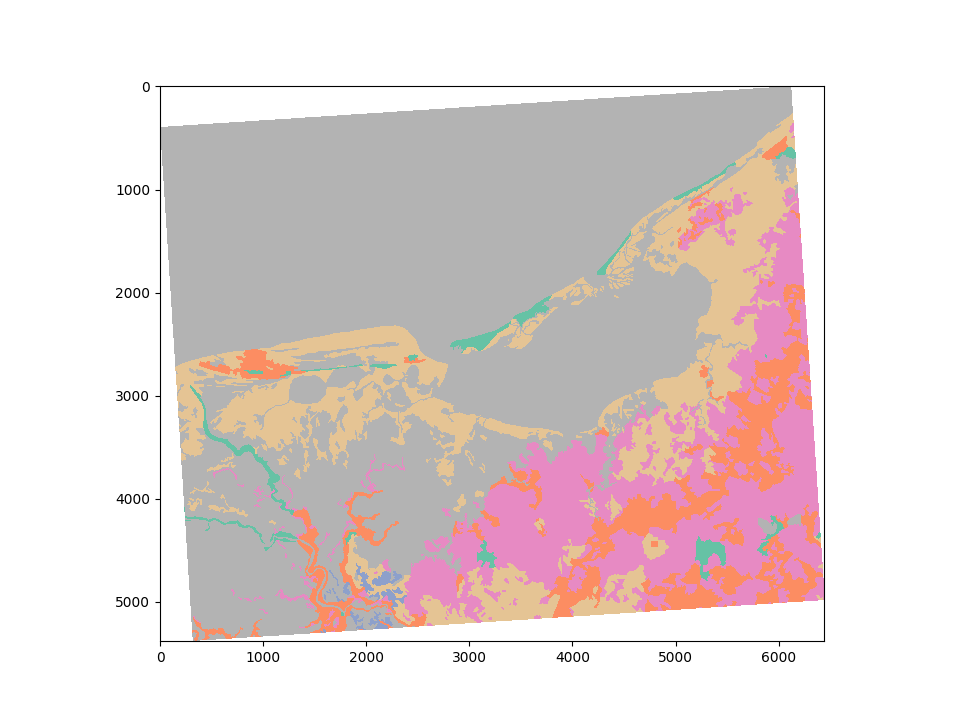

In [4]:
plt.imshow(raster)

In [5]:
raster = np.ma.masked_equal(raster, 7000) # Corresponde al valor del agua

<IPython.core.display.Javascript object>


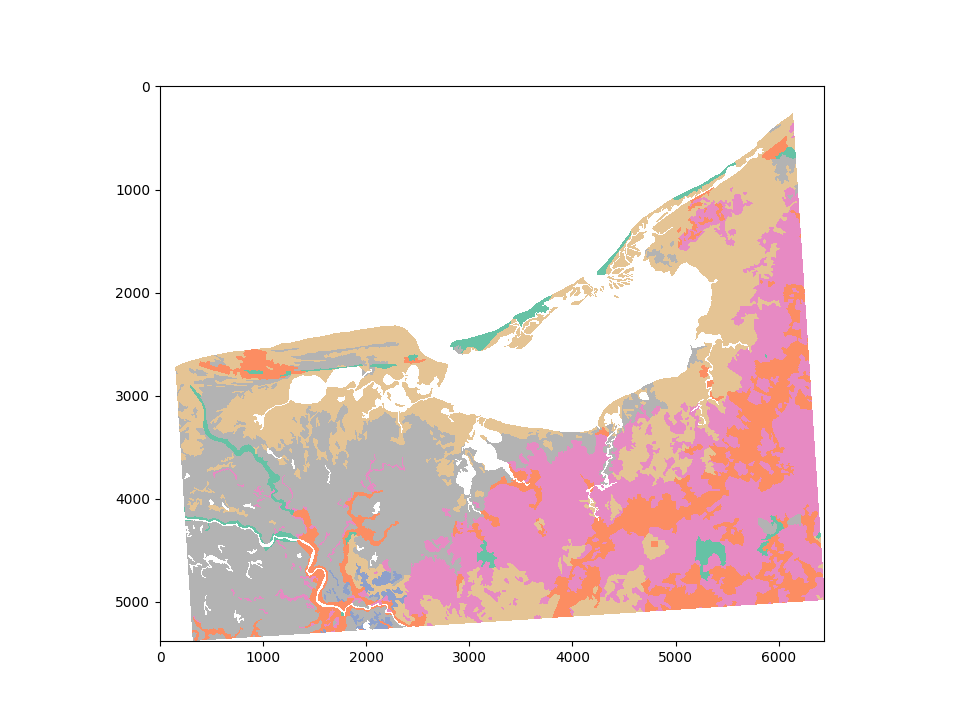

In [6]:
plt.imshow(raster)

In [7]:
np.unique(raster)

masked_array(data = [1300.0 1301.0 1303.0 1800.0 2000.0 2100.0 3500.0 3516.0 3517.0 3800.0
 3816.0 3817.0 3818.0 3916.0 3917.0 4000.0 4100.0 5800.0 6200.0 6300.0
 6400.0 6800.0 6900.0 7200.0 --],
             mask = [False False False False False False False False False False False False
 False False False False False False False False False False False False
  True],
       fill_value = 7000.0)

<IPython.core.display.Javascript object>


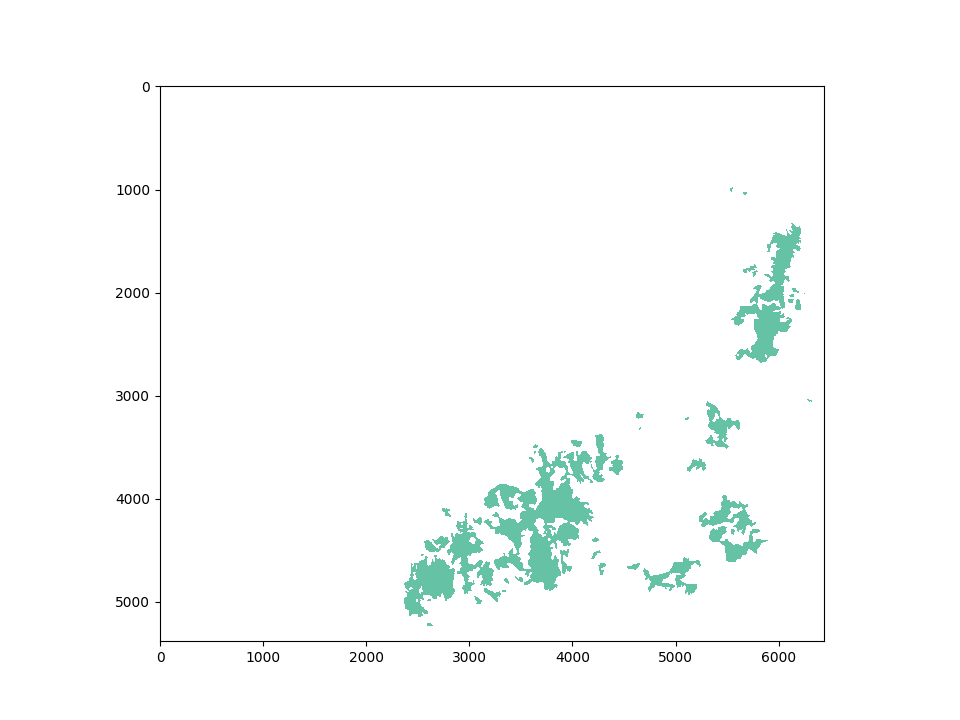

In [8]:
plt.imshow(np.ma.masked_not_equal(raster, 3800))

In [10]:
clase_3800 = np.ma.masked_not_equal(raster, 3800) # Selva media

In [11]:
np.ma.unique(clase_3800)

masked_array(data = [3800.0 --],
             mask = [False  True],
       fill_value = 7000.0)

In [12]:
clase_3800 = np.ma.where(clase_3800 == 3800, 1, clase_3800).filled(0)

In [13]:
np.unique(clase_3800)

array([ 0.,  1.])

<IPython.core.display.Javascript object>


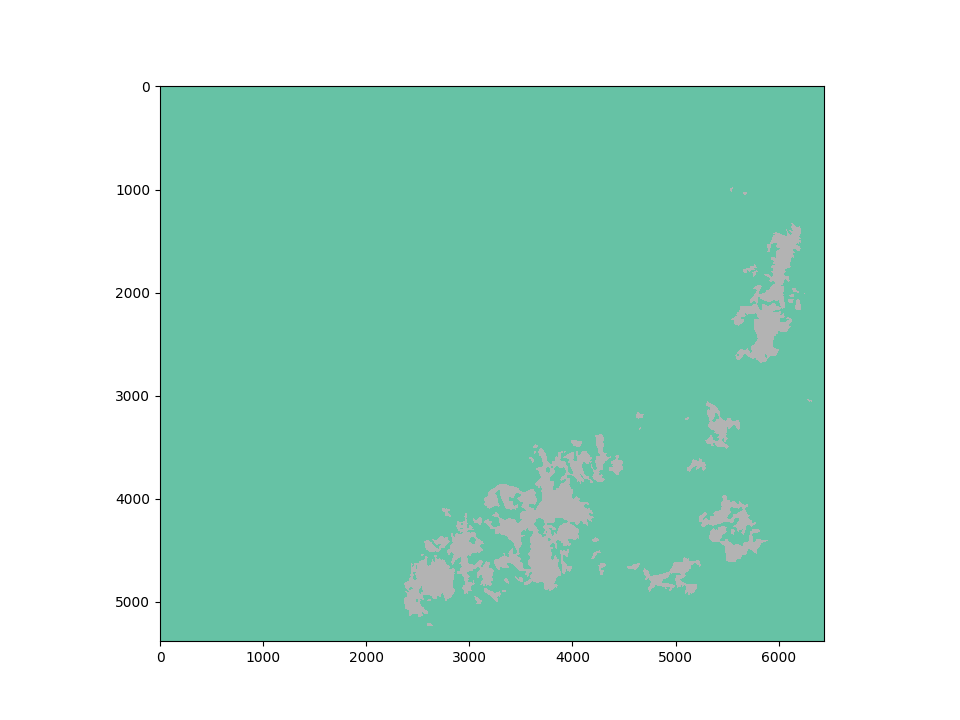

In [14]:
plt.imshow(clase_3800)

In [15]:
from scipy import ndimage

In [16]:
?ndimage.label

In [17]:
s = [[1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]]

In [18]:
label_image, nd_labels = ndimage.label(clase_3800, structure=s)

In [19]:
nd_labels

46

<IPython.core.display.Javascript object>


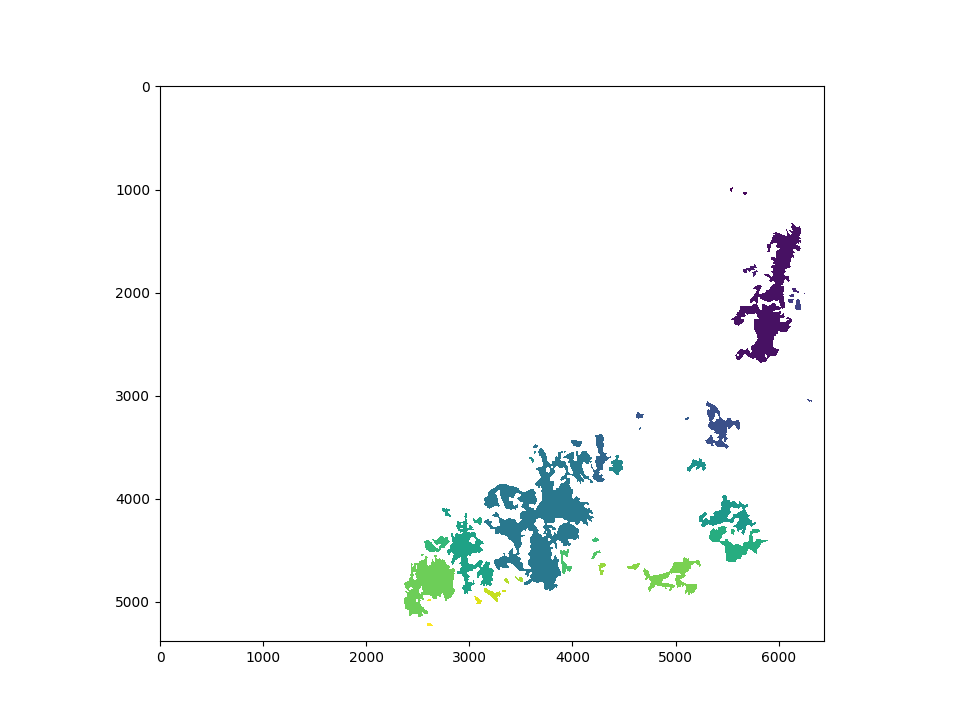

In [20]:
plt.imshow(np.ma.masked_equal(label_image, 0), cmap='viridis')

In [21]:
?ndimage.sum

In [22]:
areas = ndimage.sum(clase_3800, label_image, range(nd_labels+1))

In [23]:
areas

array([  0.00000000e+00,   7.56000000e+02,   1.05500000e+03,
         3.03453000e+05,   4.73000000e+03,   1.79700000e+03,
         1.81200000e+03,   8.80000000e+01,   9.80000000e+02,
         1.66500000e+03,   4.73600000e+03,   6.84000000e+02,
         6.21670000e+04,   3.47900000e+03,   8.14000000e+02,
         2.66000000e+02,   3.56980000e+04,   5.40900000e+03,
         1.28700000e+03,   6.10451000e+05,   2.67000000e+02,
         3.25000000e+02,   1.53210000e+04,   1.67600000e+03,
         1.23620000e+04,   7.69400000e+04,   4.06900000e+03,
         1.31654000e+05,   4.04100000e+03,   7.19090000e+04,
         1.67300000e+03,   2.16680000e+04,   2.00300000e+03,
         1.30340000e+04,   2.89100000e+03,   4.28000000e+02,
         1.73130000e+05,   7.24580000e+04,   4.84800000e+03,
         4.94100000e+03,   2.41400000e+03,   1.75400000e+03,
         9.32700000e+03,   8.08000000e+02,   3.31600000e+03,
         7.38000000e+02,   1.29600000e+03])

In [24]:
mask_size = areas*625 < 10**7

In [25]:
mask_size

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

In [26]:
remove_small = mask_size[label_image]

In [27]:
label_image[remove_small] = 0

In [28]:
labels = np.unique(label_image)
label_image = np.searchsorted(labels, label_image)

<IPython.core.display.Javascript object>


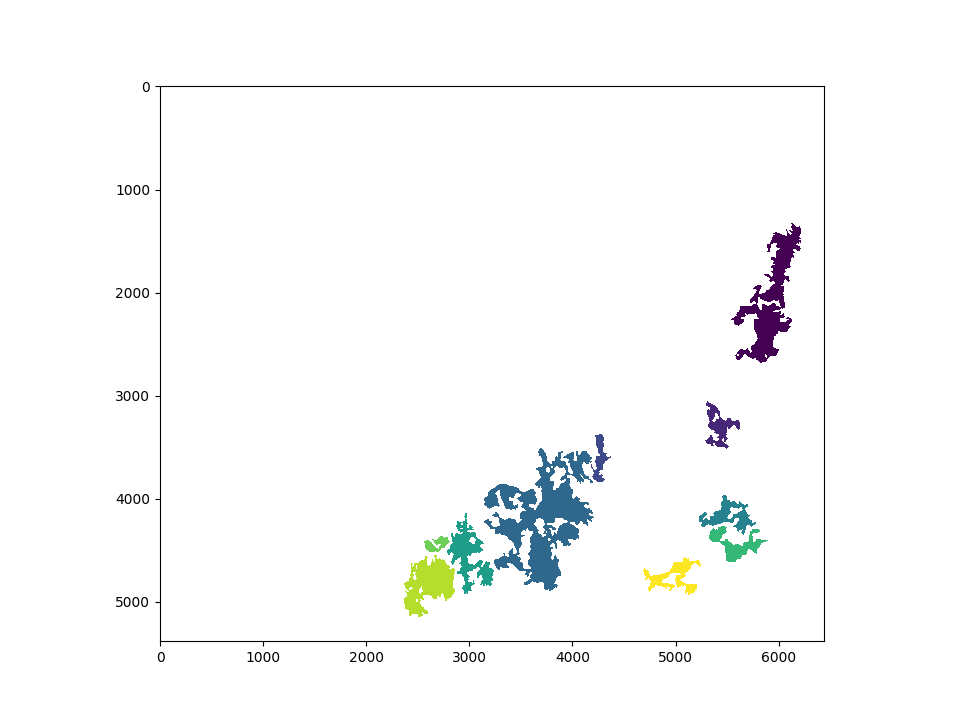

In [29]:
plt.imshow(np.ma.masked_equal(label_image,0), cmap='viridis')

In [42]:
big_areas = 1-remove_small

<IPython.core.display.Javascript object>


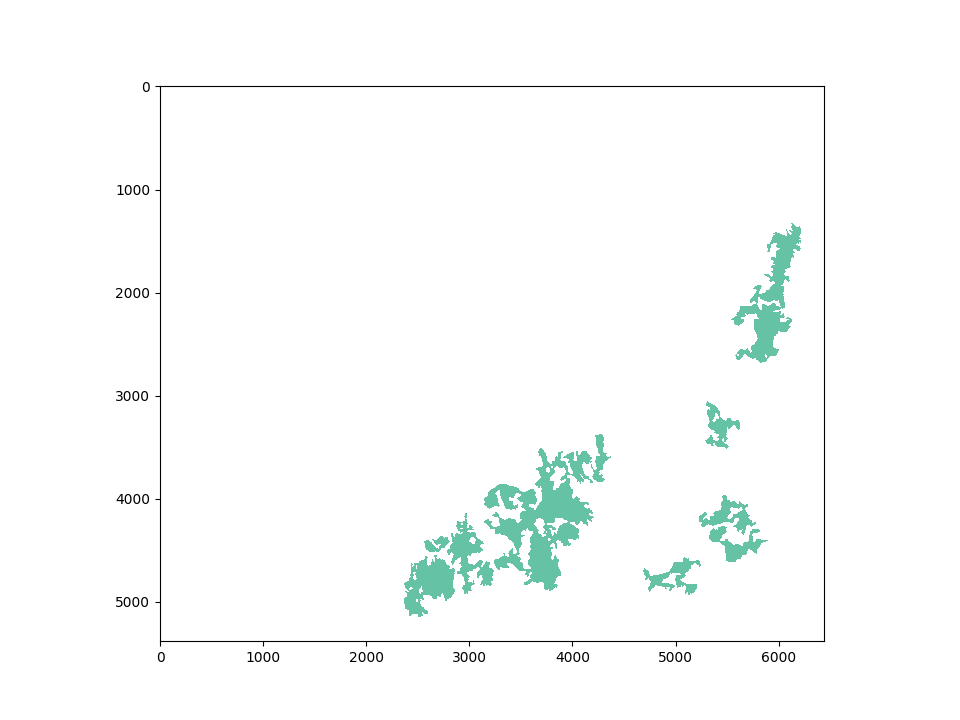

In [44]:
plt.imshow(np.ma.masked_equal(big_areas, 0))

In [50]:
eroded_regions = ndimage.morphology.binary_erosion(big_areas, structure=s, iterations=5)

<IPython.core.display.Javascript object>


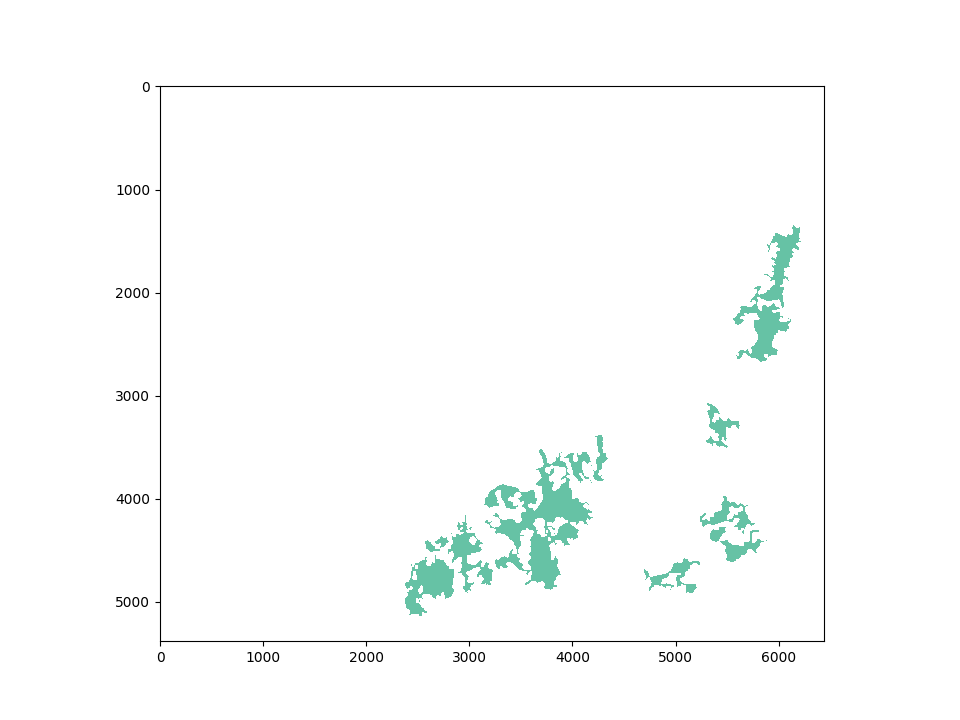

In [54]:
plt.imshow(np.ma.masked_equal(eroded_regions, 0))

<IPython.core.display.Javascript object>


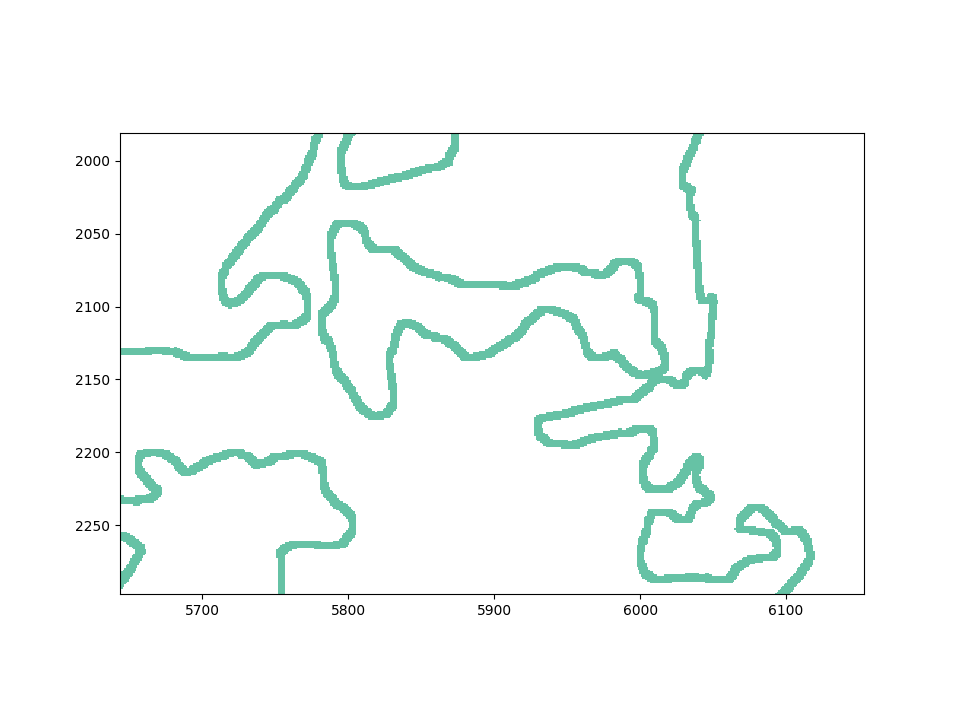

In [58]:
plt.imshow(np.ma.masked_equal(big_areas-eroded_regions, 0))

In [59]:
r = rasterio.open('../data/n19_w100_1arc_v3.tif')
r.crs

CRS({'init': 'epsg:4326'})

In [64]:
p1 = (-99.3217454, 19.2677349)
p2 = (-99.3419622, 19.27204)

In [80]:
p1_idx=r.index(*p1)
p2_idx=r.index(*p2)
print('(i, j) para punto 1: {}'.format(p1_idx))
print('(i, j) para punto 2: {}'.format(p2_idx))

(i, j) para punto 1: (2636, 2442)
(i, j) para punto 2: (2621, 2369)


In [70]:
dem = r.read(1, masked=True)

In [71]:
dem.shape

(3601, 3601)

In [72]:
from matplotlib.colors import LightSource
ls = LightSource(azdeg=315, altdeg=45)

<IPython.core.display.Javascript object>


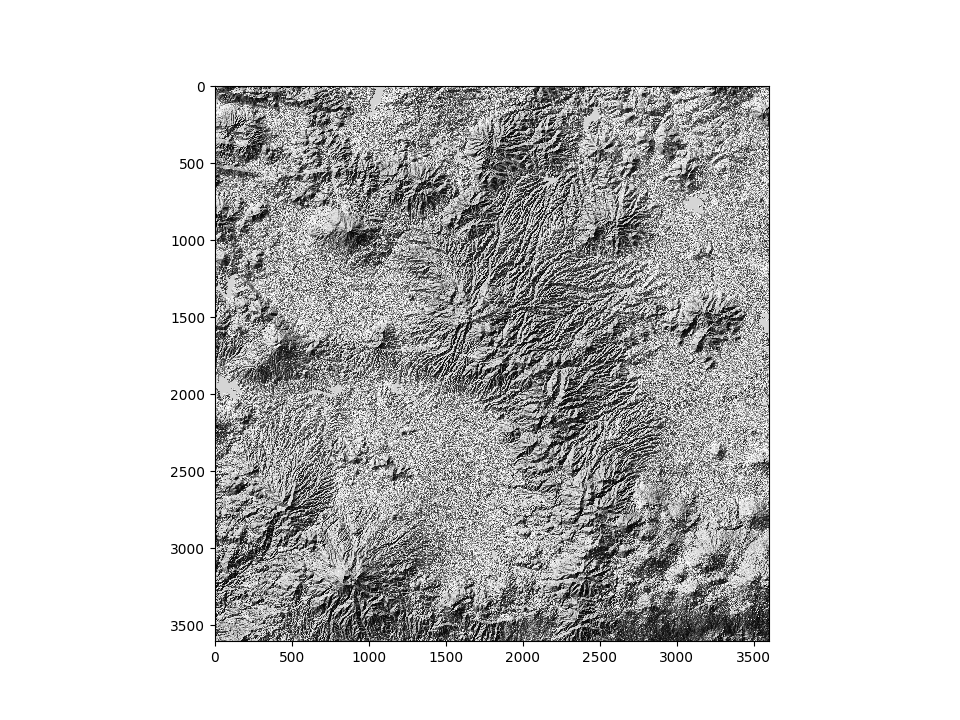

In [77]:
plt.imshow(ls.hillshade(dem), cmap='gray')

In [78]:
from skimage.graph import route_through_array

In [105]:
?route_through_array

In [81]:
path, cost = route_through_array(dem, p1_idx, p2_idx)

In [82]:
cost

283453.46880194772

In [91]:
x, y = zip(*path)

In [93]:
x=list(x)
y=list(y)

<IPython.core.display.Javascript object>


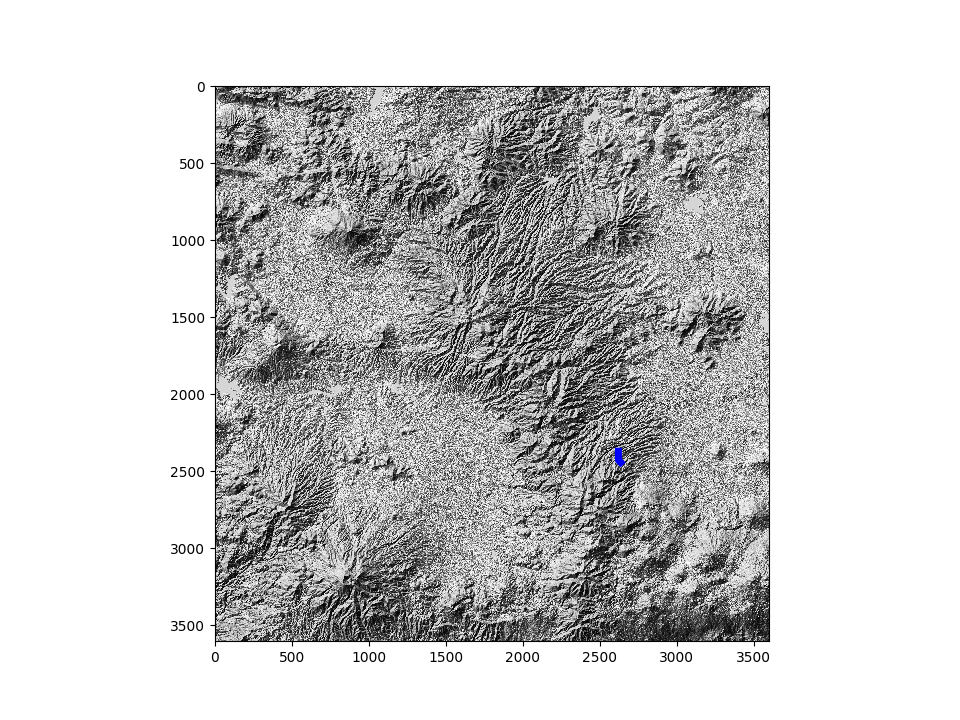

In [104]:
fig, ax = plt.subplots()
ax.imshow(ls.hillshade(dem), cmap='gray')
ax.plot(x, y, '-', linewidth=5, color='blue')

<IPython.core.display.Javascript object>


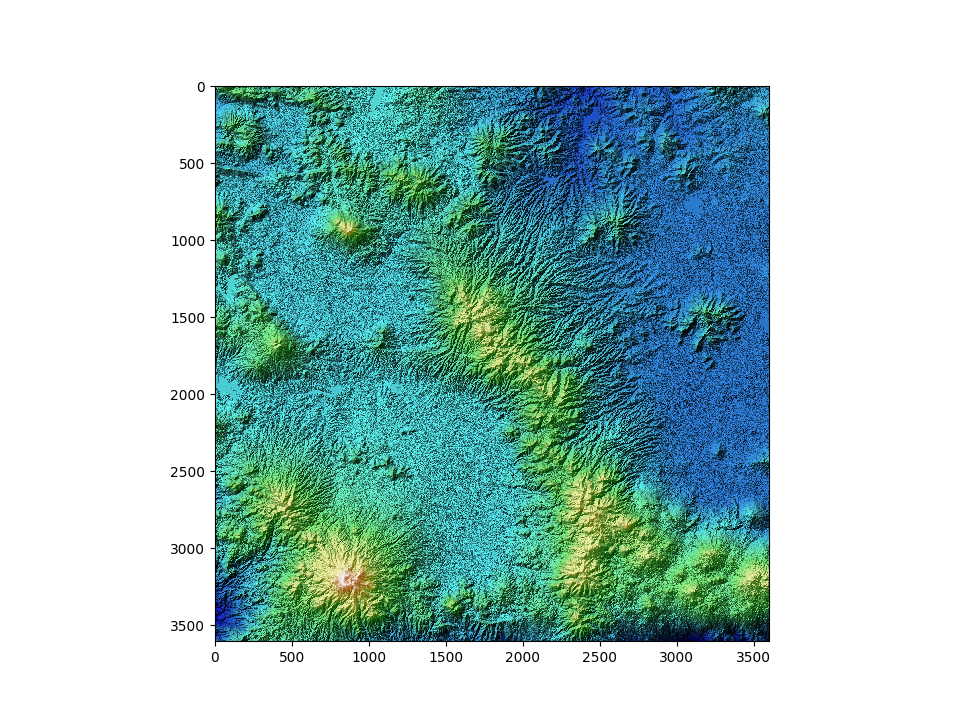

In [103]:
rgb = ls.shade(dem, cmap=plt.get_cmap('gist_earth'), blend_mode='overlay')
plt.imshow(rgb)